<a href="https://colab.research.google.com/github/DrewFinley/IMSE-441/blob/main/IMSE441_Midterm_1_(DF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IMSE 441 MIDTERM 1**

- Please rename the file as 'IMSE441_Midterm_1_(your initials)
- Complete your exam and upload the google colab code link as a submission
- Use whatever material you have as a reference when solving but please dont discuss with friends or simply copy without logic
- Total exam is 100 marks, of which 30points for in class exam and 70 marks is takehome for coding
- Of the 70 marks of coding, **5 points** will be awarded for writing the code in a well organized manner like **headings** and **# comments or interpretation of what you are doing in the code**. Make sure all graphs or pvalues have interpretation.

- ***Hint:*** If sample size of dataframe is already small, i.e. <=30, you **dont** need to create a smaller dataframe to perform t-test. 

**ALL THE VERY BEST!**

### **Question1:** (20 points)
a) Choose a discrete and continuous distribution of your choice, generate random samples and find their mean, variance and standard deviation. 

b)Plot pmf/pdf and cdf of both the distributions.

c)What is the difference between pmf and pdf?

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import expon
from scipy.stats.distributions import weibull_min
from seaborn.regression import statsmodels
import seaborn as sns
import scipy.stats as stats
!pip install pingouin
import pingouin as pg


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# a)

In [20]:
#a) Creating two distributions 
# Continous: Normal , Discrete: Binomial 
N = 500
x= np.random.randn(N)

n, p = 25, .2
success = list(range(n+1))
y = np.random.binomial(n, p, 20)

# finding the mean, var, standard deviation of each
x_mean, x_var, x_std = np.mean(x), np.var(x), np.std(x)
print('Normal mean: ', x_mean, 'Normal Var: ', x_var, 'Normal std: ', x_std)
y_mean, y_var, y_std = binom.mean(n,p), binom.var(n,p), binom.std(n,p)
print('Binomial mean: ', y_mean, 'Binomial Var: ', y_var, 'Binomial std: ', y_std)


Normal mean:  0.07653426213474489 Normal Var:  0.9598050837438862 Normal std:  0.9796964242784018
Binomial mean:  5.0 Binomial Var:  4.0 Binomial std:  2.0


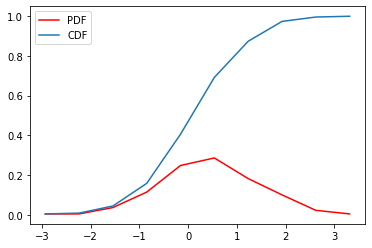

In [21]:
#b) pdf and cdf plots for Normal
#PDF
count, bins_count = np.histogram(x, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# CDF is adding all of the probabilities from PDF 
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF onto one plot
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

The PDF in red clearly shows a normal distribution similar to one shown on a z score table, which makes sense as that is the continuous distribution we made. The area under the PDF curve shows the probability of X lying between a set range. The CDF is a cumulative sum of the PDF. As you move from left to right on the PDF the probability becomes closer to 1. 

[0.0037778931862957215, 0.02361183241434831, 0.07083549724304475, 0.1357680363825023, 0.18668105002594063, 0.19601510252723775, 0.16334591877269813, 0.11084187345290243, 0.06234855381725764, 0.029442372635927125, 0.011776949054370905, 0.004014868995808261, 0.0011710034571107432, 0.00029275086427768576, 6.273232805950408e-05, 1.1500926810909087e-05, 1.7970198142045407e-06, 2.378408577623657e-07, 2.642676197359622e-08, 2.4340438659891216e-09, 1.8255328994918418e-10, 1.0866267258880012e-11, 4.939212390400009e-13, 1.6106127360000022e-14, 3.3554432000000107e-16, 3.3554432000000048e-18]


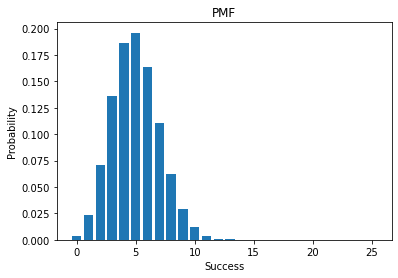

[0.0037778931862957137, 0.027389725600643983, 0.09822522284368877, 0.2339932592261913, 0.42067430925213223, 0.6166894117793686, 0.780035330552067, 0.8908772040049695, 0.9532257578222271, 0.9826681304581543, 0.9944450795125251, 0.9984599485083334, 0.9996309519654442, 0.9999237028297219, 0.9999864351577814, 0.9999979360845923, 0.9999997331044065, 0.9999999709452643, 0.9999999973720262, 0.9999999998060701, 0.9999999999886233, 0.9999999999994896, 0.9999999999999836, 0.9999999999999997, 1.0, 1.0]


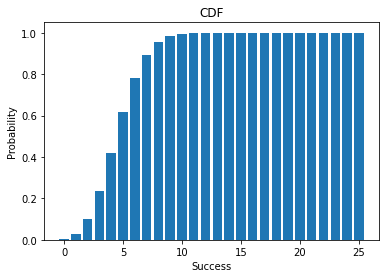

In [24]:
#b) pmf and cdf plots for Binom

# Binom PMF
Binom_pmf = [binom.pmf(k, n, p) for k in success ]
print(Binom_pmf)
plt.bar(success, Binom_pmf)
plt.xlabel('Success')
plt.ylabel('Probability')
plt.title("PMF")
plt.show()
# Binom CDF
binom_cdf = [binom.cdf(k,n,p) for k in success]
print(binom_cdf)
plt.bar(success, binom_cdf)
plt.xlabel('Success')
plt.ylabel('Probability')
plt.title("CDF")
plt.show()

The PMF on top is similar to a PDF but it shows the point pass probability. Instead of a probability for a range, the pmf gives the probability that X takes a specific value. The graph clearly shows the probability is highest near 5. The CDF on bottom is again a summation of these point probabilities. The further right you move on the PDF, the closer the sum of probabilities on the left get to 1. At 6 on the CDF the probability is already .8. 

### **Question2:** (30 points)
a) Import the data "OTT_platform_data.csv" and perform data cleaning, descriptive statistics on the  dataset to generate clean data

b) How many people watch Netflix and how many watch prime? What is the mean time spent on both the platforms. 

c) Plot a pie chart to answer the question: Based on the dataset do people like Netflix or prime more?

d) Construct a boxplot to see variability of time data on both the platforms. From the plot, determine an approximate median value each platform

#a)

In [5]:
# reading the csv file and creating a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/KhmAsif/IMSE441/main/OTT_platform_data.csv')
df

,Platform,Time
0,Netflix,0.21
1,Amazon Prime,2.53
2,Netflix,0.35
3,Amazon Prime,0.71
4,Netflix,0.67
5,Amazon Prime,0.85
6,Netflix,NaN
7,Amazon Prime,2.46
8,Netflix,1.32
9,Amazon Prime,1.49


In [6]:
#data cleaning
# check number of nan values
print(df.isnull().sum())
# remove nan values
df = df.dropna()

df.isnull().sum()

Platform    1
Time        2
dtype: int64


Platform    0
Time        0
dtype: int64

In [7]:
#lowercase column titles
df.columns = df.columns.str.lower()
df.columns

Index(['platform', 'time'], dtype='object')

In [34]:
df.info()
print('The data now contains no na values and the column titles are all lowercase')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 22
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   platform  21 non-null     object 
 1   time      21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 504.0+ bytes
The data now contains no na values and the column titles are all lowercase


#b)

In [35]:
#b number of users
plat = df.groupby('platform').size()
print(plat)
print('Grouping the entries by the platfrom shows how many belong to \n Amazon or Netflix which indicates how many users are on each platform')

platform
Amazon Prime    10
Netflix         11
dtype: int64
Grouping the entries by the platfrom shows how many belong to 
 Amazon or Netflix which indicates how many users are on each platform


In [36]:
#b mean watch time
mean_time = df.groupby('platform')['time'].mean()
print(mean_time)
print('Grouping the entries by platform and then using the \nfunction mean on the time column gives us the mean watchtime for each platform.')

platform
Amazon Prime    1.645000
Netflix         1.264545
Name: time, dtype: float64
Grouping the entries by platform and then using the 
function mean on the time column gives us the mean watchtime for each platform.


#c)

<AxesSubplot:>

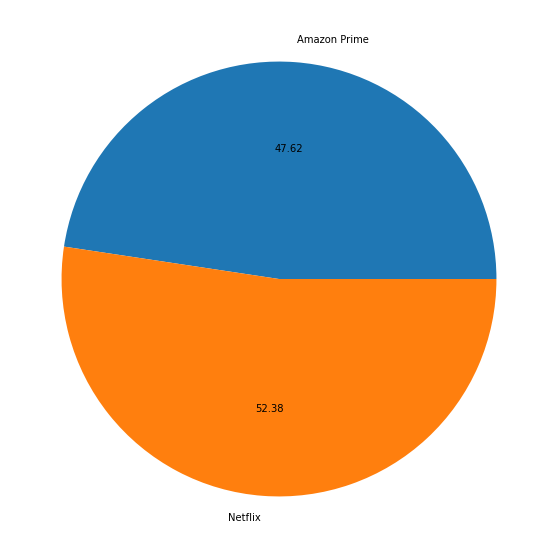

In [51]:

watch_size = df.groupby('platform').size()
watch_size.plot(kind='pie', autopct ='%.2f', figsize = (10,10), ylabel = '')


The above piechart shows the percentage of users that watch on each platform. Netflix has the edge just slightly. This is one way to measure preference but it is also important to look at time watched on each platform. This could be done with a boxplot. 

#d)

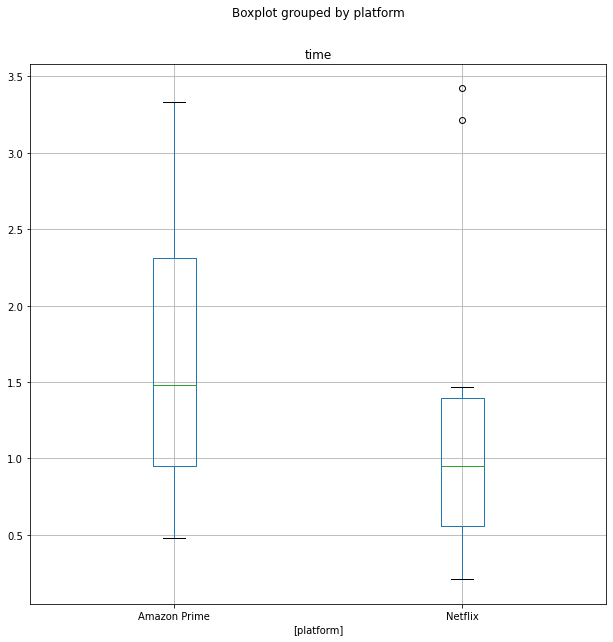

In [52]:
df.boxplot(column=['time'], by = ['platform'], figsize=(10,10));

The boxplot shows that Amazon has higher variability of data as the spread of the box is larger than that of Netflix. Amazon's is almost 1.5 while Netflix's is just 1. The whiskers of Amazon's plot also reach further. The median watch time of each platform is shown by the green line. Amazon's is about 1.5 while Netflix's is below 1. 

### **Question3:** (15 points)
a) Perform tests to check the distribution of 'Time' data in OTT_platform_data.csv before you can do t-test. Check eligibility and interpret your results.

b) Does the given data satisfy the criteria for t-testing eligibility? If so,perform t-test to see if 0.83 is an acceptable mean based on 99% significance level. Then create a 99% CI on the unknown mean value of 'Time'

c) Is it one sided or two sided CI?

d) What is the degree of freedom value for the test?

e) Calculate df['Time'].mean(), is it the actual mean or sample mean?



#a)

Text(0.5, 1.0, 'Watch Time Normality')

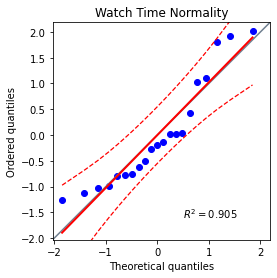

In [54]:
plt.show()            
pg.qqplot(df['time']).set_title('Watch Time Normality')

The data isn't perfectly normal but it does fit within the bounds and is close to the bold red line. The R squared value is also fairly high mean the goodness of fit to the model is also high. With all this in mind, it can be assumed the data follows a normal distribution. 

In [13]:
print(stats.normaltest(df['time']))

NormaltestResult(statistic=2.9693617401687833, pvalue=0.22657463588450225)


Running a normal test returns a pvalue larger than alpha which fails to reject the H0 hypothesis, the data frame is normally distributed. 

Having proven that the data is normally distributed, it meets the requirements to run a t test, as the data also contains less than 40 samples. 

#b)
The data is already small enough so a smaller sample is not needed. For this test alpha = .01

In [14]:
stats.ttest_1samp(df['time'],.83)

TtestResult(statistic=2.817958669950323, pvalue=0.010626190992228224, df=20)

The pvalue is slightly larger than an alpha of .01. This means we can fail to reject the null hypothesis or accpt that the mean is .83. Although because the pvalue is so close to alpha the decision could be made to gather more data to be sure of the conclusion. 

In [15]:
T,P = stats.ttest_1samp(df['time'],.83)
T,P

(2.817958669950323, 0.010626190992228224)

In [16]:
if P < 0.01:
  print("Reject Null Hypothesis i.e. actual mean is NOT .83")
else:
  print("Accept Null Hypothesis i.e. actual mean is .83")

Accept Null Hypothesis i.e. actual mean is .83


In [17]:

CI= stats.ttest_1samp(df['time'],.83).confidence_interval(confidence_level=0.99)
CI


ConfidenceInterval(low=0.8240173368904734, high=2.067411234538098)

The CI contains the .83 hypothesized although just barely. This further backs up the point earlier that more data would be needed to be sure of the mean. The range of values is also very large due to the high confidence level specified. The trade off for being almost certain of the range having the mean is that we don't know specifically where the mean is. 

#c) 
This is a two sided confidence interval because the goal is to find a range of where the mean could be within. Had the goal been determining if the mean was larger than .83 a one sided CI would've been used. 

#d)
Code at the top of part b determined the degrees of freedom to be 20. This calculation is simply one less than the number of observations. 21 -1 = 20 

In [18]:
deg_freedom = len(df) -1
deg_freedom

20

#e)
This is the sample mean as our data is a sample of the entire population of users. This is the mean that was used to find the CI. 

In [19]:
df['time'].mean()

1.4457142857142857